In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.datasets import load_diabetes

In [2]:
players = pd.read_csv('combined_data.csv')
# predicting passing accuracy
players.dropna(inplace=True)
players = players[players['Position'] != 'GK']

<bound method NDFrame.head of              Player                                             Match  \
0          A. Smith                         Bournemouth - Everton 3:0   
1          A. Smith                    Leeds United - Bournemouth 4:3   
2          A. Smith               Bournemouth - Tottenham Hotspur 2:3   
3          A. Smith                 West Ham United - Bournemouth 2:0   
4          A. Smith                     Bournemouth - Southampton 0:1   
...             ...                                               ...   
107207  Y. Mosquera           Atlético Nacional - Deportivo Pasto 1:0   
107208  Y. Mosquera               Millonarios - Atlético Nacional 3:0   
107209  Y. Mosquera               Atlético Nacional - River Plate 1:1   
107210  Y. Mosquera             Palmeiras - Atlético Nacional (P) 0:0   
107211  Y. Mosquera  Atlético Mineiro U20 - Atlético Nacional U20 3:4   

                             Competition        Date   Position  \
0                England. 

In [44]:
import pandas as pd

# Define a function to calculate passing accuracy for each row
def calculate_passing_accuracy(row):
    total_passes = (row['Total passes'] +
                    row['Long passes'] + 
                    row['Crosses'] +
                    row['Through passes']  +
                    row['Forward passes'] +
                    row['Back passes']  +
                    row['Passes to GK'] +
                    row['Passes to penalty area']
                    )
    total_accurate_passes = (row['Accurate back passes'] +
                             row['Accurate crosses'] +
                             row['Accurate forward passes'] +
                             row['Accurate long passes'] +
                             row['Accurate passes'] +
                             row['Accurate passes to GK'] +
                             row['Accurate passes to penalty area'] +
                             row['Accurate through passes'])
    if total_passes == 0:
        return 0
    else:
        return (total_accurate_passes / total_passes) * 100

# Apply the function to each row to calculate passing accuracy
players['Passing Accuracy'] = players.apply(calculate_passing_accuracy, axis=1)

# Print the DataFrame with the calculated passing accuracy for each player
print(players[['Player', 'Passing Accuracy']])


             Player  Passing Accuracy
0          A. Smith         78.947368
1          A. Smith         90.697674
2          A. Smith         70.175439
3          A. Smith         91.176471
4          A. Smith         89.600000
...             ...               ...
107207  Y. Mosquera         87.000000
107208  Y. Mosquera         78.301887
107209  Y. Mosquera         75.000000
107210  Y. Mosquera         83.333333
107211  Y. Mosquera         85.585586

[97722 rows x 2 columns]


In [45]:
player_passing_accuracy = players.groupby('Player')['Passing Accuracy'].mean().reset_index()



In [46]:
def shooting_accuracy(row):
    total_shots = row['Shots']
    total_accurate_shots = row['Shots on target']
    if total_shots == 0:
        return 0
    else:
        return (total_accurate_shots / total_shots) * 100

# Apply the function to each row to calculate shooting accuracy
players['Shooting Accuracy'] = players.apply(shooting_accuracy, axis=1)

# Print the DataFrame with the calculated shooting accuracy for each player
print(players[['Player', 'Shooting Accuracy']])


             Player  Shooting Accuracy
0          A. Smith                0.0
1          A. Smith                0.0
2          A. Smith                0.0
3          A. Smith                0.0
4          A. Smith                0.0
...             ...                ...
107207  Y. Mosquera                0.0
107208  Y. Mosquera                0.0
107209  Y. Mosquera                0.0
107210  Y. Mosquera                0.0
107211  Y. Mosquera                0.0

[97722 rows x 2 columns]


In [47]:
player_shots_accuracy = players.groupby('Player')['Shooting Accuracy'].mean().reset_index()
print(player_shots_accuracy)

               Player  Shooting Accuracy
0        A. Armstrong          33.760045
1    A. Bella-Kotchap           6.645963
2            A. Broja          30.000000
3        A. Cresswell           9.519573
4         A. Doucouré          20.716981
..                ...                ...
427       Y. Bissouma          10.272257
428           Y. Mina          20.833333
429       Y. Mosquera           8.108108
430      Y. Tielemans          23.998839
431          Y. Wissa          31.758242

[432 rows x 2 columns]


In [48]:
def tackles_accuracy(row):
    total_tackles = row['Sliding tackles']
    total_accurate_tackles = row['Successful sliding tackles']
    if total_tackles == 0:
        return 0
    else:
        return (total_accurate_tackles / total_tackles)*100
players['Tackles Accuracy'] = players.apply(tackles_accuracy, axis=1)

print(players[['Player', 'Tackles Accuracy']])

             Player  Tackles Accuracy
0          A. Smith               0.0
1          A. Smith               0.0
2          A. Smith               0.0
3          A. Smith               0.0
4          A. Smith               0.0
...             ...               ...
107207  Y. Mosquera               0.0
107208  Y. Mosquera               0.0
107209  Y. Mosquera               0.0
107210  Y. Mosquera               0.0
107211  Y. Mosquera               0.0

[97722 rows x 2 columns]


In [49]:
player_tackles_accuracy = players.groupby('Player')['Tackles Accuracy'].mean().reset_index()
print(player_tackles_accuracy)

               Player  Tackles Accuracy
0        A. Armstrong          5.000000
1    A. Bella-Kotchap         18.840580
2            A. Broja          0.787402
3        A. Cresswell         11.091340
4         A. Doucouré          7.735849
..                ...               ...
427       Y. Bissouma         19.347826
428           Y. Mina         15.804598
429       Y. Mosquera         20.270270
430      Y. Tielemans         22.398374
431          Y. Wissa          9.116809

[432 rows x 2 columns]


In [50]:
def interceptions(row):
    interceptions = row['Interceptions']
    return (interceptions / 90)

players['Interceptions per 90 minutes']  = players.apply(interceptions, axis=1)
print(players[['Player', 'Interceptions per 90 minutes']])

             Player  Interceptions per 90 minutes
0          A. Smith                      0.044444
1          A. Smith                      0.122222
2          A. Smith                      0.044444
3          A. Smith                      0.022222
4          A. Smith                      0.055556
...             ...                           ...
107207  Y. Mosquera                      0.077778
107208  Y. Mosquera                      0.066667
107209  Y. Mosquera                      0.022222
107210  Y. Mosquera                      0.022222
107211  Y. Mosquera                      0.033333

[97722 rows x 2 columns]


In [51]:
players_interceptions = players.groupby('Player')['Interceptions per 90 minutes'].mean().reset_index()
print(players_interceptions)

               Player  Interceptions per 90 minutes
0        A. Armstrong                      0.011875
1    A. Bella-Kotchap                      0.063285
2            A. Broja                      0.012248
3        A. Cresswell                      0.049703
4         A. Doucouré                      0.043438
..                ...                           ...
427       Y. Bissouma                      0.035411
428           Y. Mina                      0.056561
429       Y. Mosquera                      0.048649
430      Y. Tielemans                      0.039295
431          Y. Wissa                      0.019753

[432 rows x 2 columns]


In [52]:
def accurate_dribbles(row):
    total_dribbles = row['Dribbles']
    accurate_dribbles = row['Successful dribbles']
    if total_dribbles == 0:
        return 0
    else:
        return (accurate_dribbles / total_dribbles)*100

players['Accurate Dribbles'] = players.apply(accurate_dribbles, axis=1)
print(players[['Player', 'Accurate Dribbles']])
    

             Player  Accurate Dribbles
0          A. Smith          50.000000
1          A. Smith           0.000000
2          A. Smith           0.000000
3          A. Smith           0.000000
4          A. Smith         100.000000
...             ...                ...
107207  Y. Mosquera           0.000000
107208  Y. Mosquera         100.000000
107209  Y. Mosquera         100.000000
107210  Y. Mosquera           0.000000
107211  Y. Mosquera          66.666667

[97722 rows x 2 columns]


In [53]:
players_dribbles = players.groupby('Player')['Accurate Dribbles'].mean().reset_index()
print(players_dribbles)

               Player  Accurate Dribbles
0        A. Armstrong          42.470927
1    A. Bella-Kotchap          30.437740
2            A. Broja          38.201787
3        A. Cresswell          28.224030
4         A. Doucouré          38.432805
..                ...                ...
427       Y. Bissouma          41.586937
428           Y. Mina          13.864943
429       Y. Mosquera          29.504505
430      Y. Tielemans          42.617499
431          Y. Wissa          45.517355

[432 rows x 2 columns]


In [54]:
def duels_won(row):
    total_duels = (row['Duels'] +
                   row['Aerial duels'] +
                   row['Defensive duels'] +
                   row['Loose ball duels'] +
                   row['Offensive duel']
    )
    duels_won = (row['Duels won'] +
                 row['Aerial duels won'] +
                 row['Defensive duels won'] +
                 row['Loose ball duels won'] +
                 row['Offensive duels won']

    )
    if total_duels == 0:
        return 0
    else:
        return (duels_won / total_duels)*100
    
players['Duels Won Accuracy'] = players.apply(duels_won, axis=1)
print(players[['Player', 'Duels Won Accuracy']])

             Player  Duels Won Accuracy
0          A. Smith           55.555556
1          A. Smith           50.000000
2          A. Smith           37.500000
3          A. Smith           47.058824
4          A. Smith           50.000000
...             ...                 ...
107207  Y. Mosquera           64.705882
107208  Y. Mosquera           75.000000
107209  Y. Mosquera           72.727273
107210  Y. Mosquera           33.333333
107211  Y. Mosquera           59.090909

[97722 rows x 2 columns]


In [55]:
players_duels_won = players.groupby('Player')['Duels Won Accuracy'].mean().reset_index()
print(players_duels_won)

               Player  Duels Won Accuracy
0        A. Armstrong           34.963540
1    A. Bella-Kotchap           63.961339
2            A. Broja           32.923185
3        A. Cresswell           50.946625
4         A. Doucouré           48.875437
..                ...                 ...
427       Y. Bissouma           50.242513
428           Y. Mina           60.662685
429       Y. Mosquera           59.391425
430      Y. Tielemans           50.235257
431          Y. Wissa           45.952086

[432 rows x 2 columns]


In [56]:
def recoveries(row):
    total_recoveries = (row['Recoveries'] +
                        row['Opp. half recoveries']
                        )
    return (total_recoveries / 90)

players['Recoveries per 90 minutes'] = players.apply(recoveries, axis=1)
print(players['Recoveries per 90 minutes'])

0         0.111111
1         0.111111
2         0.033333
3         0.066667
4         0.200000
            ...   
107207    0.111111
107208    0.100000
107209    0.077778
107210    0.022222
107211    0.122222
Name: Recoveries per 90 minutes, Length: 97722, dtype: float64


In [57]:
players_recoveries = players.groupby('Player')['Recoveries per 90 minutes'].mean().reset_index()
print(players_recoveries)

               Player  Recoveries per 90 minutes
0        A. Armstrong                   0.032465
1    A. Bella-Kotchap                   0.133885
2            A. Broja                   0.027122
3        A. Cresswell                   0.105733
4         A. Doucouré                   0.138407
..                ...                        ...
427       Y. Bissouma                   0.102271
428           Y. Mina                   0.130220
429       Y. Mosquera                   0.118619
430      Y. Tielemans                   0.109214
431          Y. Wissa                   0.041643

[432 rows x 2 columns]


In [58]:
def key_passes(row):
    total_key_passes = (row['Assists'] +
                        row['Shot assists'] +
                        row['Second assists'] +
                        row['Passes to final third']

    )
    accurat_key_passes = (row['Assists'] +
                        row['Shot assists'] +
                        row['Second assists'] +
                        row['Accurate passes to final third'])
    if total_key_passes == 0:
        return 0
    else:
        return (accurat_key_passes / total_key_passes)*100
    
players['Key Passes'] = players.apply(key_passes, axis=1)
print(players['Key Passes'])

0         100.000000
1         100.000000
2          60.000000
3          66.666667
4          72.727273
             ...    
107207     72.727273
107208     80.000000
107209      0.000000
107210      0.000000
107211     50.000000
Name: Key Passes, Length: 97722, dtype: float64


In [59]:
players_key_passes = players.groupby('Player')['Key Passes'].mean().reset_index()
print(players_key_passes)

               Player  Key Passes
0        A. Armstrong   61.130152
1    A. Bella-Kotchap   47.644244
2            A. Broja   44.619423
3        A. Cresswell   69.160634
4         A. Doucouré   75.333403
..                ...         ...
427       Y. Bissouma   68.225631
428           Y. Mina   62.515463
429       Y. Mosquera   52.759253
430      Y. Tielemans   74.617391
431          Y. Wissa   52.745218

[432 rows x 2 columns]


In [60]:
data = [player_passing_accuracy, player_shots_accuracy, player_tackles_accuracy, players_dribbles, players_duels_won, players_interceptions, players_key_passes, players_recoveries]
df = data[0]  # Initialize the DataFrame with the first DataFrame in the list
for i in range(1, len(data)):
    df = pd.merge(df, data[i], on='Player')
print(df.head())

             Player  Passing Accuracy  Shooting Accuracy  Tackles Accuracy  \
0      A. Armstrong         69.946385          33.760045          5.000000   
1  A. Bella-Kotchap         73.632398           6.645963         18.840580   
2          A. Broja         68.922605          30.000000          0.787402   
3      A. Cresswell         72.928488           9.519573         11.091340   
4       A. Doucouré         81.841030          20.716981          7.735849   

   Accurate Dribbles  Duels Won Accuracy  Interceptions per 90 minutes  \
0          42.470927           34.963540                      0.011875   
1          30.437740           63.961339                      0.063285   
2          38.201787           32.923185                      0.012248   
3          28.224030           50.946625                      0.049703   
4          38.432805           48.875437                      0.043438   

   Key Passes  Recoveries per 90 minutes  
0   61.130152                   0.032465  


In [61]:
df['Recoveries'] = df['Recoveries per 90 minutes'] / df['Recoveries per 90 minutes'].max() * 100
df['Interceptions'] = df['Interceptions per 90 minutes'] / df['Interceptions per 90 minutes'].max() * 100


In [62]:
df.drop(['Recoveries per 90 minutes', 'Interceptions per 90 minutes'], axis=1, inplace=True)
print(df.head())

             Player  Passing Accuracy  Shooting Accuracy  Tackles Accuracy  \
0      A. Armstrong         69.946385          33.760045          5.000000   
1  A. Bella-Kotchap         73.632398           6.645963         18.840580   
2          A. Broja         68.922605          30.000000          0.787402   
3      A. Cresswell         72.928488           9.519573         11.091340   
4       A. Doucouré         81.841030          20.716981          7.735849   

   Accurate Dribbles  Duels Won Accuracy  Key Passes  Recoveries  \
0          42.470927           34.963540   61.130152   17.061523   
1          30.437740           63.961339   47.644244   70.361001   
2          38.201787           32.923185   44.619423   14.253257   
3          28.224030           50.946625   69.160634   55.566269   
4          38.432805           48.875437   75.333403   72.737071   

   Interceptions  
0      13.793772  
1      73.510668  
2      14.227586  
3      57.734561  
4      50.456927  


In [63]:
# Assigning equal weights to all performance metrics
num_metrics = len(df.columns) - 1  # Excluding the 'Player' column
weight_per_metric = 1 / num_metrics
# Create a dictionary to hold the weights for each performance metric
weights = {col: weight_per_metric for col in df.columns[1:]}
# Calculate weighted scores for each player
weighted_scores = df[['Passing Accuracy', 'Shooting Accuracy', 'Tackles Accuracy', 'Interceptions', 'Accurate Dribbles', 'Duels Won Accuracy', 'Key Passes', 'Recoveries']].mul(weights.values()).sum(axis=1)
# Normalize overall performance scores 
min_score = weighted_scores.min()
max_score = weighted_scores.max()
normalized_scores = (weighted_scores - min_score) / (max_score - min_score) * 100




In [64]:
# Add overall performance scores to DataFrame
df['Overall Performance'] = normalized_scores
print(df['Overall Performance'].head())

0    57.195732
1    80.769803
2    49.656292
3    74.184877
4    83.216475
Name: Overall Performance, dtype: float64


In [65]:
y = df['Overall Performance']
X = df[['Accurate Dribbles', 'Passing Accuracy', 'Shooting Accuracy', 'Tackles Accuracy', 'Duels Won Accuracy', 'Key Passes', 'Recoveries', 'Interceptions']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (345, 8), y_train shape: (345,)
X_test shape: (87, 8), y_test shape: (87,)


In [83]:
regression_tree = DecisionTreeRegressor(max_depth=4)
regression_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [84]:
y_predict = regression_tree.predict(X_test)

In [85]:
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 16.79026650475368


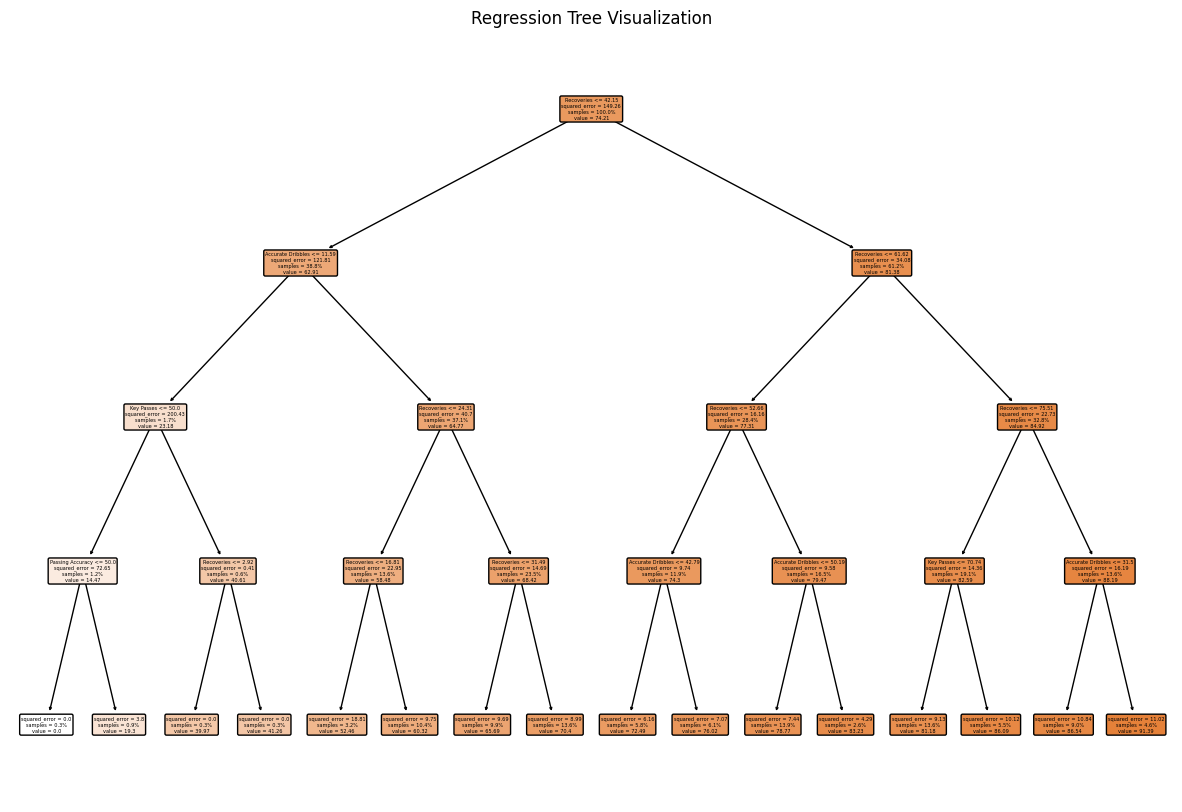

In [86]:
plt.figure(figsize=(15, 10))
plot_tree(regression_tree, feature_names=list(X.columns), filled=True, rounded=True, proportion=True, precision=2)
plt.title("Regression Tree Visualization")
plt.show()

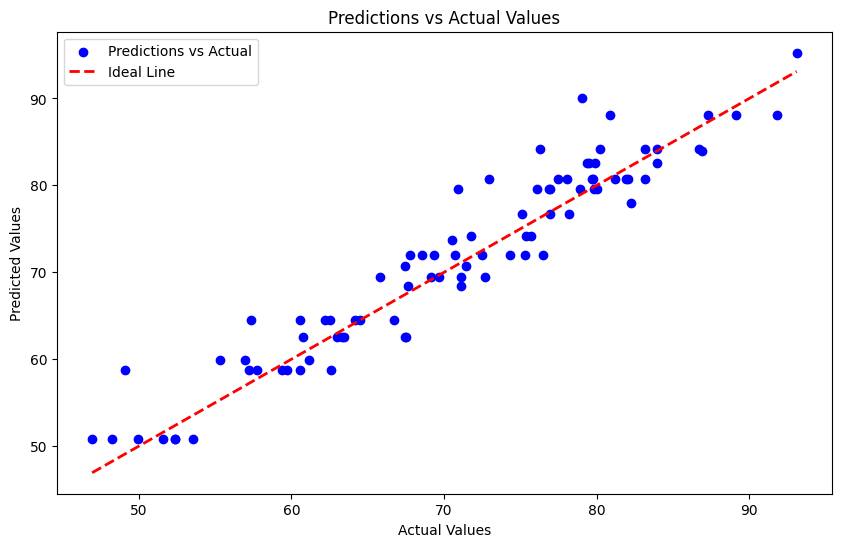

In [70]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, color='blue', label='Predictions vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

RANDOM FOREST

In [71]:
# Define an Random Forest object using RandomForestRegressor 
rf_model = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [72]:
# Make predictions
y_pred_RF = rf_model.predict(X_test)

In [73]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_RF)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.333850100192073


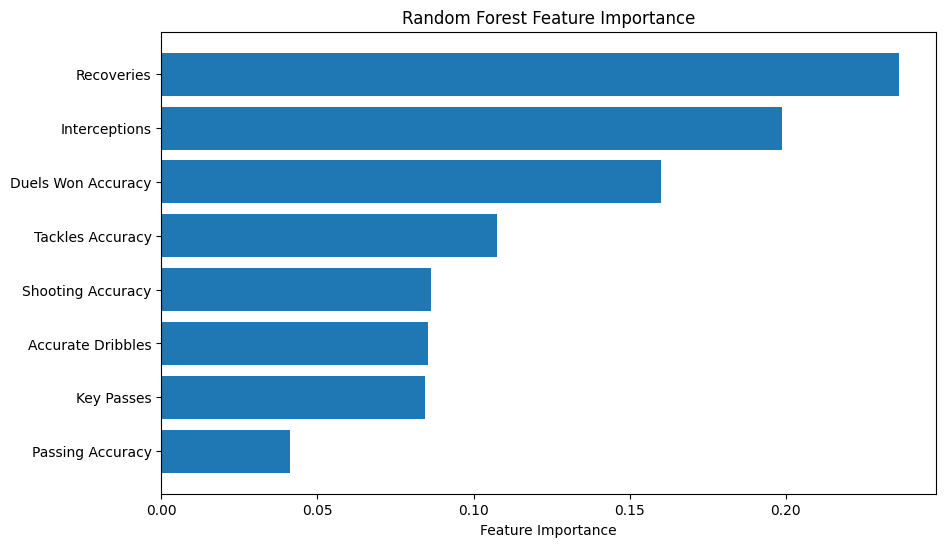

In [74]:
# Get feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

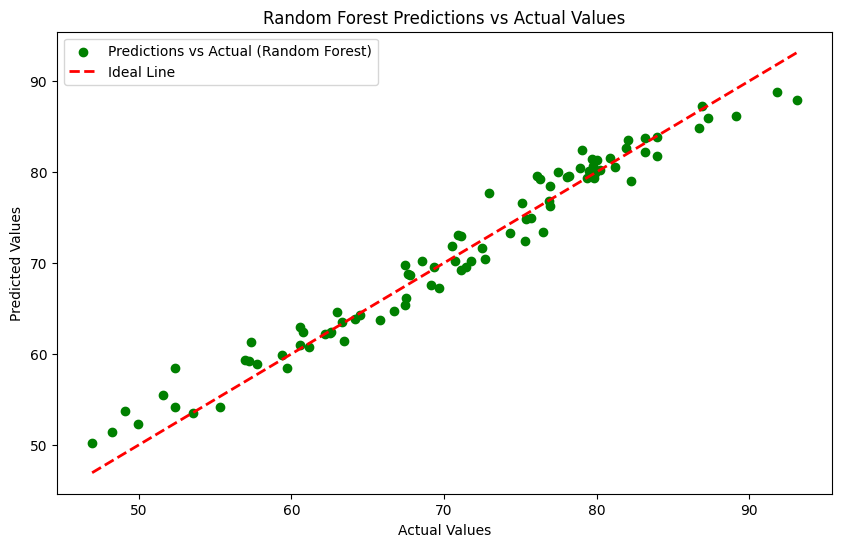

In [75]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_RF, color='green', label='Predictions vs Actual (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

BAGGING AND BOOSTING


In [76]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

# Defining and fitting the model
bagging_model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the model
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
print(f'Mean Squared Error (Bagging): {mse_bagging}')

Mean Squared Error (Bagging): 2.056043540007757e-27


C:\Users\Gur Levy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


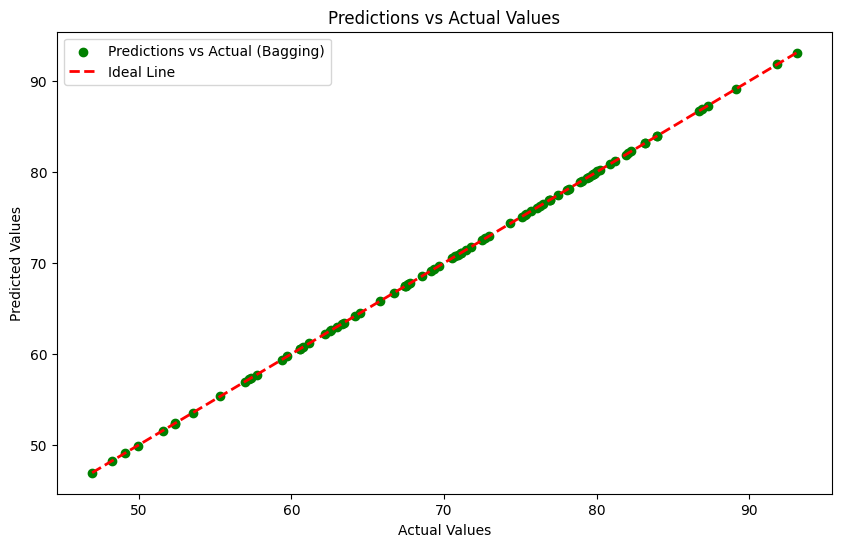

In [77]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bagging, color='green', label='Predictions vs Actual (Bagging)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [78]:
from sklearn.ensemble import AdaBoostRegressor

# Defining and fitting the model
adaboost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
print(f'Mean Squared Error (AdaBoost): {mse_adaboost}')

Mean Squared Error (AdaBoost): 9.35920480950513


C:\Users\Gur Levy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


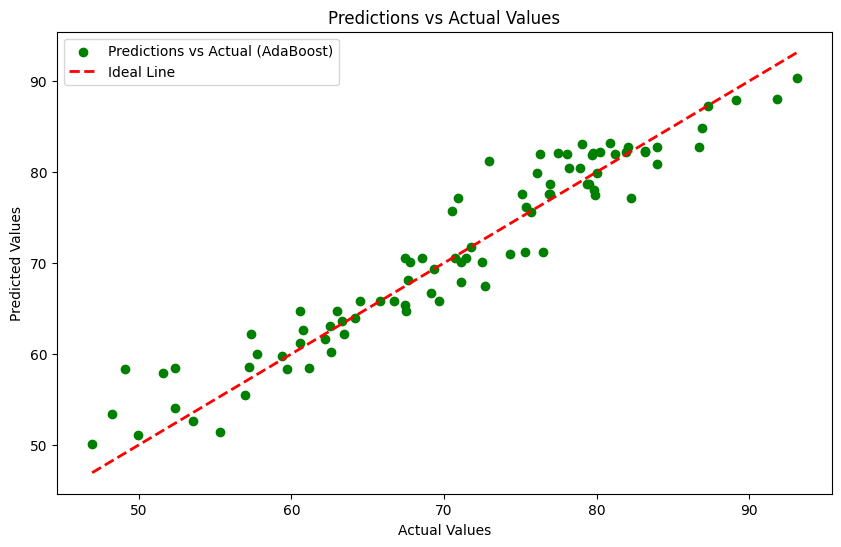

In [79]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_adaboost, color='green', label='Predictions vs Actual (AdaBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [80]:
from xgboost import XGBRegressor

# Defining and fitting the model
xgb_model = XGBRegressor(max_depth=3, n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')

Mean Squared Error (XGBoost): 2.9816692204019226


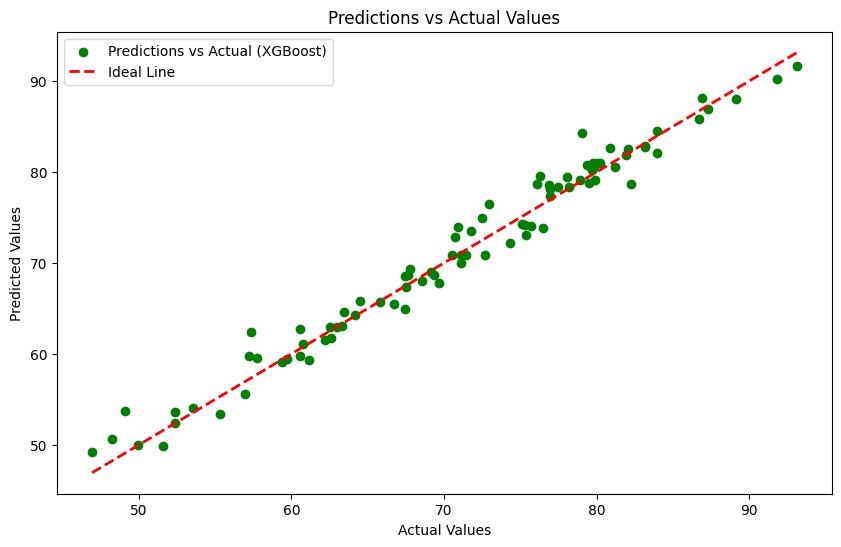

In [81]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', label='Predictions vs Actual (XGBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Mean Squared Error for y_pred_cart: 11.385333525435808
Mean Squared Error for y_pred_rf: 4.333850100192073
Mean Squared Error for y_pred_bagging: 2.056043540007757e-27
Mean Squared Error for y_pred_adaboost: 9.35920480950513
Mean Squared Error for y_pred_xgb: 2.9816692204019226


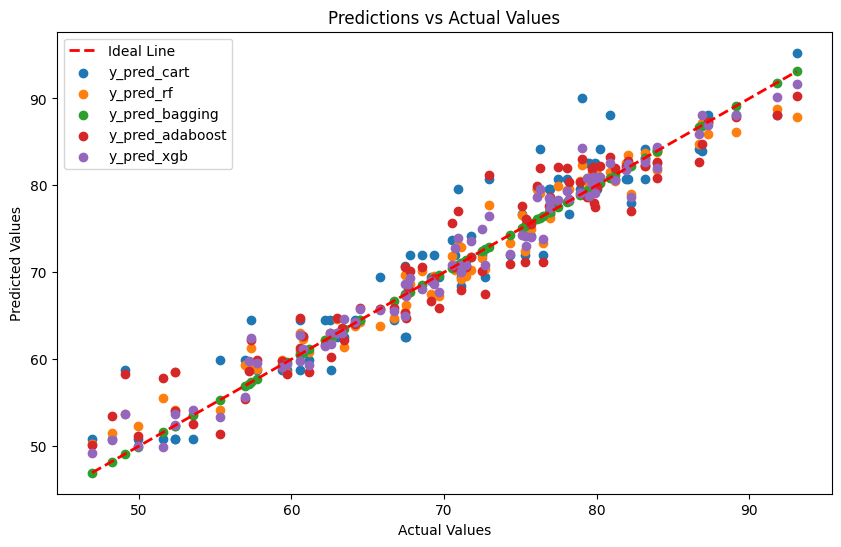

In [82]:
plt.figure(figsize=(10, 6))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
yvalue = [y_predict,y_pred_RF,y_pred_bagging,y_pred_adaboost,y_pred_xgb]
ylabel = ['y_pred_cart','y_pred_rf','y_pred_bagging','y_pred_adaboost','y_pred_xgb']

for yi in range(len(ylabel)):
    # Plotting predictions vs actual values
    plt.scatter(y_test, yvalue[yi],label=ylabel[yi])
    mse_xgb = mean_squared_error(y_test, yvalue[yi])
    print(f'Mean Squared Error for {ylabel[yi]}: {mse_xgb}')

plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()